### Linear Basis Function Models

Linear regression models share the property of being linear in their parameters but not necessarily in their input variables. Using non-linear basis functions of input variables, linear models are able model arbitrary non-linearities from input variables to targets. A linear regression model $f(\mathbf{x}, \mathbf{w})$ can therefore be defined more generally as
$$
y = f(\mathbf{x}, \mathbf{w}) + \epsilon, \quad f(\mathbf{x}, \mathbf{w}) = w_0 + \sum_{j=1}^{M-1}{w_j \phi_j(\mathbf{x})} = \sum_{j=0}^{M-1}{w_j \phi_j(\mathbf{x})} = \mathbf{w}^T \boldsymbol\phi(\mathbf{x}) \tag{1}
$$
where $\phi_j$ are basis functions and $M$ is the total number of parameters $w_j$ including the bias term $w_0$, and $\epsilon \sim \mathcal{N}(0, \beta^{-1})$ is an additive random noise with precision $\beta$. The corresponding conditional distribution of $y$ given $\mathbf{x}$ can therefore be written as
$$
p(y \lvert \mathbf{x}, \mathbf{w}, \beta) = 
\mathcal{N}(y \mid f(\mathbf{x}, \mathbf{w}), \beta^{-1}) =
\sqrt{\beta \over {2 \pi}} \exp\left(-{\beta \over 2} (y - f(\mathbf{x}, \mathbf{w}))^2 \right). \tag{2}
$$

### Prior and Posterior Distribution

For a Bayesian treatment of linear regression, we need a prior probability distribution over model parameters $\mathbf{w}$, and for simplicity, let's assume $p(\mathbf{w} \lvert \alpha) = \mathcal{N}(\mathbf{w} \lvert \mathbf{0}, \alpha^{-1}\mathbf{I})$. Due to conjugacy, the posterior has an analytical solution:
$$
p(\mathbf{w} \lvert \mathbf{y}, \alpha, \beta) = \mathcal{N}(\mathbf{w} \mid \mathbf{m}_N, \mathbf{S}_N), \quad \mathbf{m}_N = \beta \mathbf{S}_N \boldsymbol\Phi^T \mathbf{y}, \quad \mathbf{S}_N^{-1} = \alpha\mathbf{I} + \beta \boldsymbol\Phi^T \boldsymbol\Phi  \tag{3}
$$
where $\boldsymbol\Phi$ is called the *design matrix*:

$$
\boldsymbol\Phi = 
\begin{pmatrix}
\phi_0(\mathbf{x}_1) &  \phi_1(\mathbf{x}_1) & \cdots & \phi_{M-1}(\mathbf{x}_1) \\ 
\phi_0(\mathbf{x}_2) &  \phi_1(\mathbf{x}_2) & \cdots & \phi_{M-1}(\mathbf{x}_2) \\
\vdots & \vdots & \ddots & \vdots \\
\phi_0(\mathbf{x}_N) &  \phi_1(\mathbf{x}_N) & \cdots & \phi_{M-1}(\mathbf{x}_N)
\end{pmatrix}.\tag{4}
$$
Maximizing the log posterior w.r.t. $\mathbf{w}$ gives the [maximum-a-posteriori](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP) estimate of $\mathbf{w}$, which can be seen equivalent to minimizing the sum-of-squares error function plus a quadratic regularization term.

### Posterior Predictive Distribution

For making a prediction $y$ at a new location $\mathbf{x}$ we use the posterior predictive distribution, which includes uncertainty about parameters $\mathbf{w}$ into predictions by weighting the conditional distribution $p(y \lvert \mathbf{x}, \mathbf{w}, \beta)$ with the posterior probability of weights $p(\mathbf{w} \lvert \mathbf{t}, \alpha, \beta)$:
$$
p(y \lvert \mathbf{x}, \mathbf{t}, \alpha, \beta) = 
\int{p(y \lvert \mathbf{x}, \mathbf{w}, \beta) p(\mathbf{w} \lvert \mathbf{y}, \alpha, \beta) d\mathbf{w}} = 
\mathcal{N}(t \lvert \mathbf{m}_N^T \boldsymbol\phi(\mathbf{x}), \sigma_N^2(\mathbf{x})) \tag{5}
$$
where $\sigma_N^2(\mathbf{x})$ is the corresponding predictive variance
$$
\sigma_N^2(\mathbf{x}) = {1 \over \beta} + \boldsymbol\phi(\mathbf{x})^T \mathbf{S}_N \boldsymbol\phi(\mathbf{x}).\tag{6}
$$
The first term in $(6)$ represents the inherent noise in the data (aleatoric uncertainty) and the second term covers the uncertainty about parameters $\mathbf{w}$ (epistemic uncertainty).

### Empirical Bayes
So far, we have assumed that the values of $\alpha$ and $\beta$ are known. In a fully Bayesian treatment, however, we should define priors over $\alpha$ and $\beta$ and use the corresponding posteriors to additionally include uncertainties about $\alpha$ and $\beta$ into predictions. Unfortunately, complete integration over all three parameters $\mathbf{w}$, $\alpha$ and $\beta$ is analytically intractable and we have to resort to their point estimates by maximizing the resulting *marginal likelihood* or *evidence function* w.r.t. $\alpha$ and $\beta$:
$$
\log p(\mathbf{y} \lvert \alpha, \beta) = \log 
\int{p(\mathbf{y} \lvert \mathbf{w}, \beta) p(\mathbf{w} \lvert \alpha) d\mathbf{w}} = {M \over 2} \log \alpha + {N \over 2} \log \beta -
E(\mathbf{m}_N) - {1 \over 2} \log \lvert \mathbf{S}_N^{-1}\rvert - {N \over 2} \log {2 \pi} \tag{7}
$$
This approach is known as [empirical Bayes](https://en.wikipedia.org/wiki/Empirical_Bayes_method), which is considered a good approximation for a fully Bayesian treatment if the posterior for $\alpha$ and $\beta$ is sharply peaked around the most probable value and the prior is relatively flat. Integrating over model parameters or using a good approximation for it allows us to estimate values for $\alpha$ and $\beta$ without using a validation set.

Maximization of the log marginal likelihood w.r.t. $\alpha$ and $\beta$ gives the following implicit solutions.

$$
\alpha = {\gamma \over \mathbf{m}_N^T \mathbf{m}_N}, \quad {1 \over \beta} = {1 \over N - \gamma} \sum_{i=1}^{N}(t_i - \mathbf{m}_N^T \boldsymbol\phi(\mathbf{x}_i))^2, \quad \gamma = \sum_{i=0}^{M-1} {\lambda_i \over \alpha + \lambda_i} \tag{8}
$$
where $\lambda_i$ are the [eigenvalues](https://en.wikipedia.org/wiki/Eigenvalues_and_eigenvectors) of $\beta \boldsymbol\Phi^T \boldsymbol\Phi$. The solutions are implicit because $\alpha$ and $\gamma$ as well as $\beta$ and $\gamma$ depend on each other. Solutions for $\alpha$ and $\beta$ can therefore be obtained by starting with initial values for these parameters and then iterating over the above equations until convergence.

### Implementation

The datasets used in the following examples are based on $N$ scalar observations $\{x_i\}_{i = 1}^N$ which are combined into a $N \times 1$ matrix $\mathbf{X}$. Target values $\mathbf{y}$ are generated from $\mathbf{X}$ with functions `f` and `g` which also generate random noise whose variance can be specified with the `noise_variance` parameter. We will use `f` for generating noisy samples from a straight line and `g` for generating noisy samples from a sinusoidal function.

In [2]:
import numpy as np

f_w0 = -0.3
f_w1 = 0.5


def f(X, noise_variance):
    """Linear function plus noise"""
    return f_w0 + f_w1 * X + noise(X.shape, noise_variance)


def g(X, noise_variance):
    """Sinus function plus noise"""
    return 0.5 + np.sin(2 * np.pi * X) + noise(X.shape, noise_variance)


def noise(size, variance):
    return np.random.normal(scale=np.sqrt(variance), size=size)

For straight line fitting, a model that is linear in its input variable $x$ is sufficient. Hence, we don't need to transform $x$ with a basis function which is equivalent to using an `identity_basis_function`. For fitting a linear model to a sinusoidal dataset we transform input $x$ with `gaussian_basis_function` and later with `polynomial_basis_function`. The design matrix $\boldsymbol\Phi$ can be computed from observations $\mathbf{X}$ and a parametric basis function with function `expand`. This function also prepends a column vector $\mathbf{1}$ according to $\phi_0(x) = 1$.

In [3]:
def identity_basis_function(x):
    return x


def gaussian_basis_function(x, mu, sigma=0.1):
    return np.exp(-0.5 * (x - mu) ** 2 / sigma ** 2)


def polynomial_basis_function(x, degree):
    return x ** degree


def expand(x, bf, bf_args=None):
    if bf_args is None:
        return np.concatenate([np.ones(x.shape), bf(x)], axis=1)
    else:
        return np.concatenate([np.ones(x.shape)] + [bf(x, bf_arg) for bf_arg in bf_args], axis=1)

Function `posterior` computes the mean and covariance matrix of the posterior distribution and function `posterior_predictive` computes the mean and the variances of the posterior predictive distribution.

In [8]:
def posterior(Phi, t, alpha, beta, return_inverse=False):
    """Computes mean and covariance matrix of the posterior distribution."""
    S_N_inv = alpha * np.eye(Phi.shape[1]) + beta * Phi.T.dot(Phi)
    S_N = np.linalg.inv(S_N_inv)
    m_N = beta * S_N.dot(Phi.T).dot(t)
    if return_inverse:
        return m_N, S_N, S_N_inv
    else:
        return m_N, S_N


def posterior_predictive(Phi_test, m_N, S_N, beta):
    """Computes mean and variances of the posterior predictive distribution."""
    y = Phi_test.dot(m_N)
    # Only compute variances (diagonal elements of covariance matrix)
    y_var = 1 / beta + np.sum(Phi_test.dot(S_N) * Phi_test, axis=1)
    return y, y_var

In [35]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


def plot_data(x, t):
    plt.scatter(x, t, marker="o", c="k", s=20)


def plot_truth(x, y, label="Truth"):
    plt.plot(x, y, "k--", label=label)


def plot_predictive(x, y, std, y_label="Prediction", std_label="Uncertainty", plot_xy_labels=True):
    y = y.ravel()
    std = std.ravel()
    plt.plot(x, y, label=y_label)
    plt.fill_between(x.ravel(), y + std, y - std, alpha=0.5, label=std_label)
    if plot_xy_labels:
        plt.xlabel("x")
        plt.ylabel("y")


def plot_posterior_samples(x, ys, plot_xy_labels=True):
    plt.plot(x, ys[:, 0], "r-", alpha=0.5, label="Post. samples")
    for i in range(1, ys.shape[1]):
        plt.plot(x, ys[:, i], "r-", alpha=0.5)
    if plot_xy_labels:
        plt.xlabel("x")
        plt.ylabel("y")


def plot_posterior(mean, cov, w0, w1):
    resolution = 100
    grid_x = grid_y = np.linspace(-1, 1, resolution)
    grid_flat = np.dstack(np.meshgrid(grid_x, grid_y)).reshape(-1, 2)
    densities = stats.multivariate_normal.pdf(grid_flat, mean=mean.ravel(), cov=cov).reshape(resolution, resolution)
    plt.imshow(densities, origin="lower", extent=(-1, 1, -1, 1))
    plt.scatter(w0, w1, marker="x", c="r", s=20, label="Truth")
    plt.xlabel("w0")
    plt.ylabel("w1")


def print_comparison(title, a, b, a_prefix="np", b_prefix="br"):
    print(title)
    print("-" * len(title))
    print(f"{a_prefix}:", a)
    print(f"{b_prefix}:", b)
    print()

For straight line fitting, we use a linear regression model of the form $y(x, \mathbf{w}) = w_0 + w_1 x$ and do Bayesian inference for model parameters $\mathbf{w}$. Predictions are made with the posterior predictive distribution. Since this model has only two parameters, $w_0$ and $w_1$, we can visualize the posterior density in 2D which is done in the first column of the following output. Rows use an increasing number of training data from a training dataset.

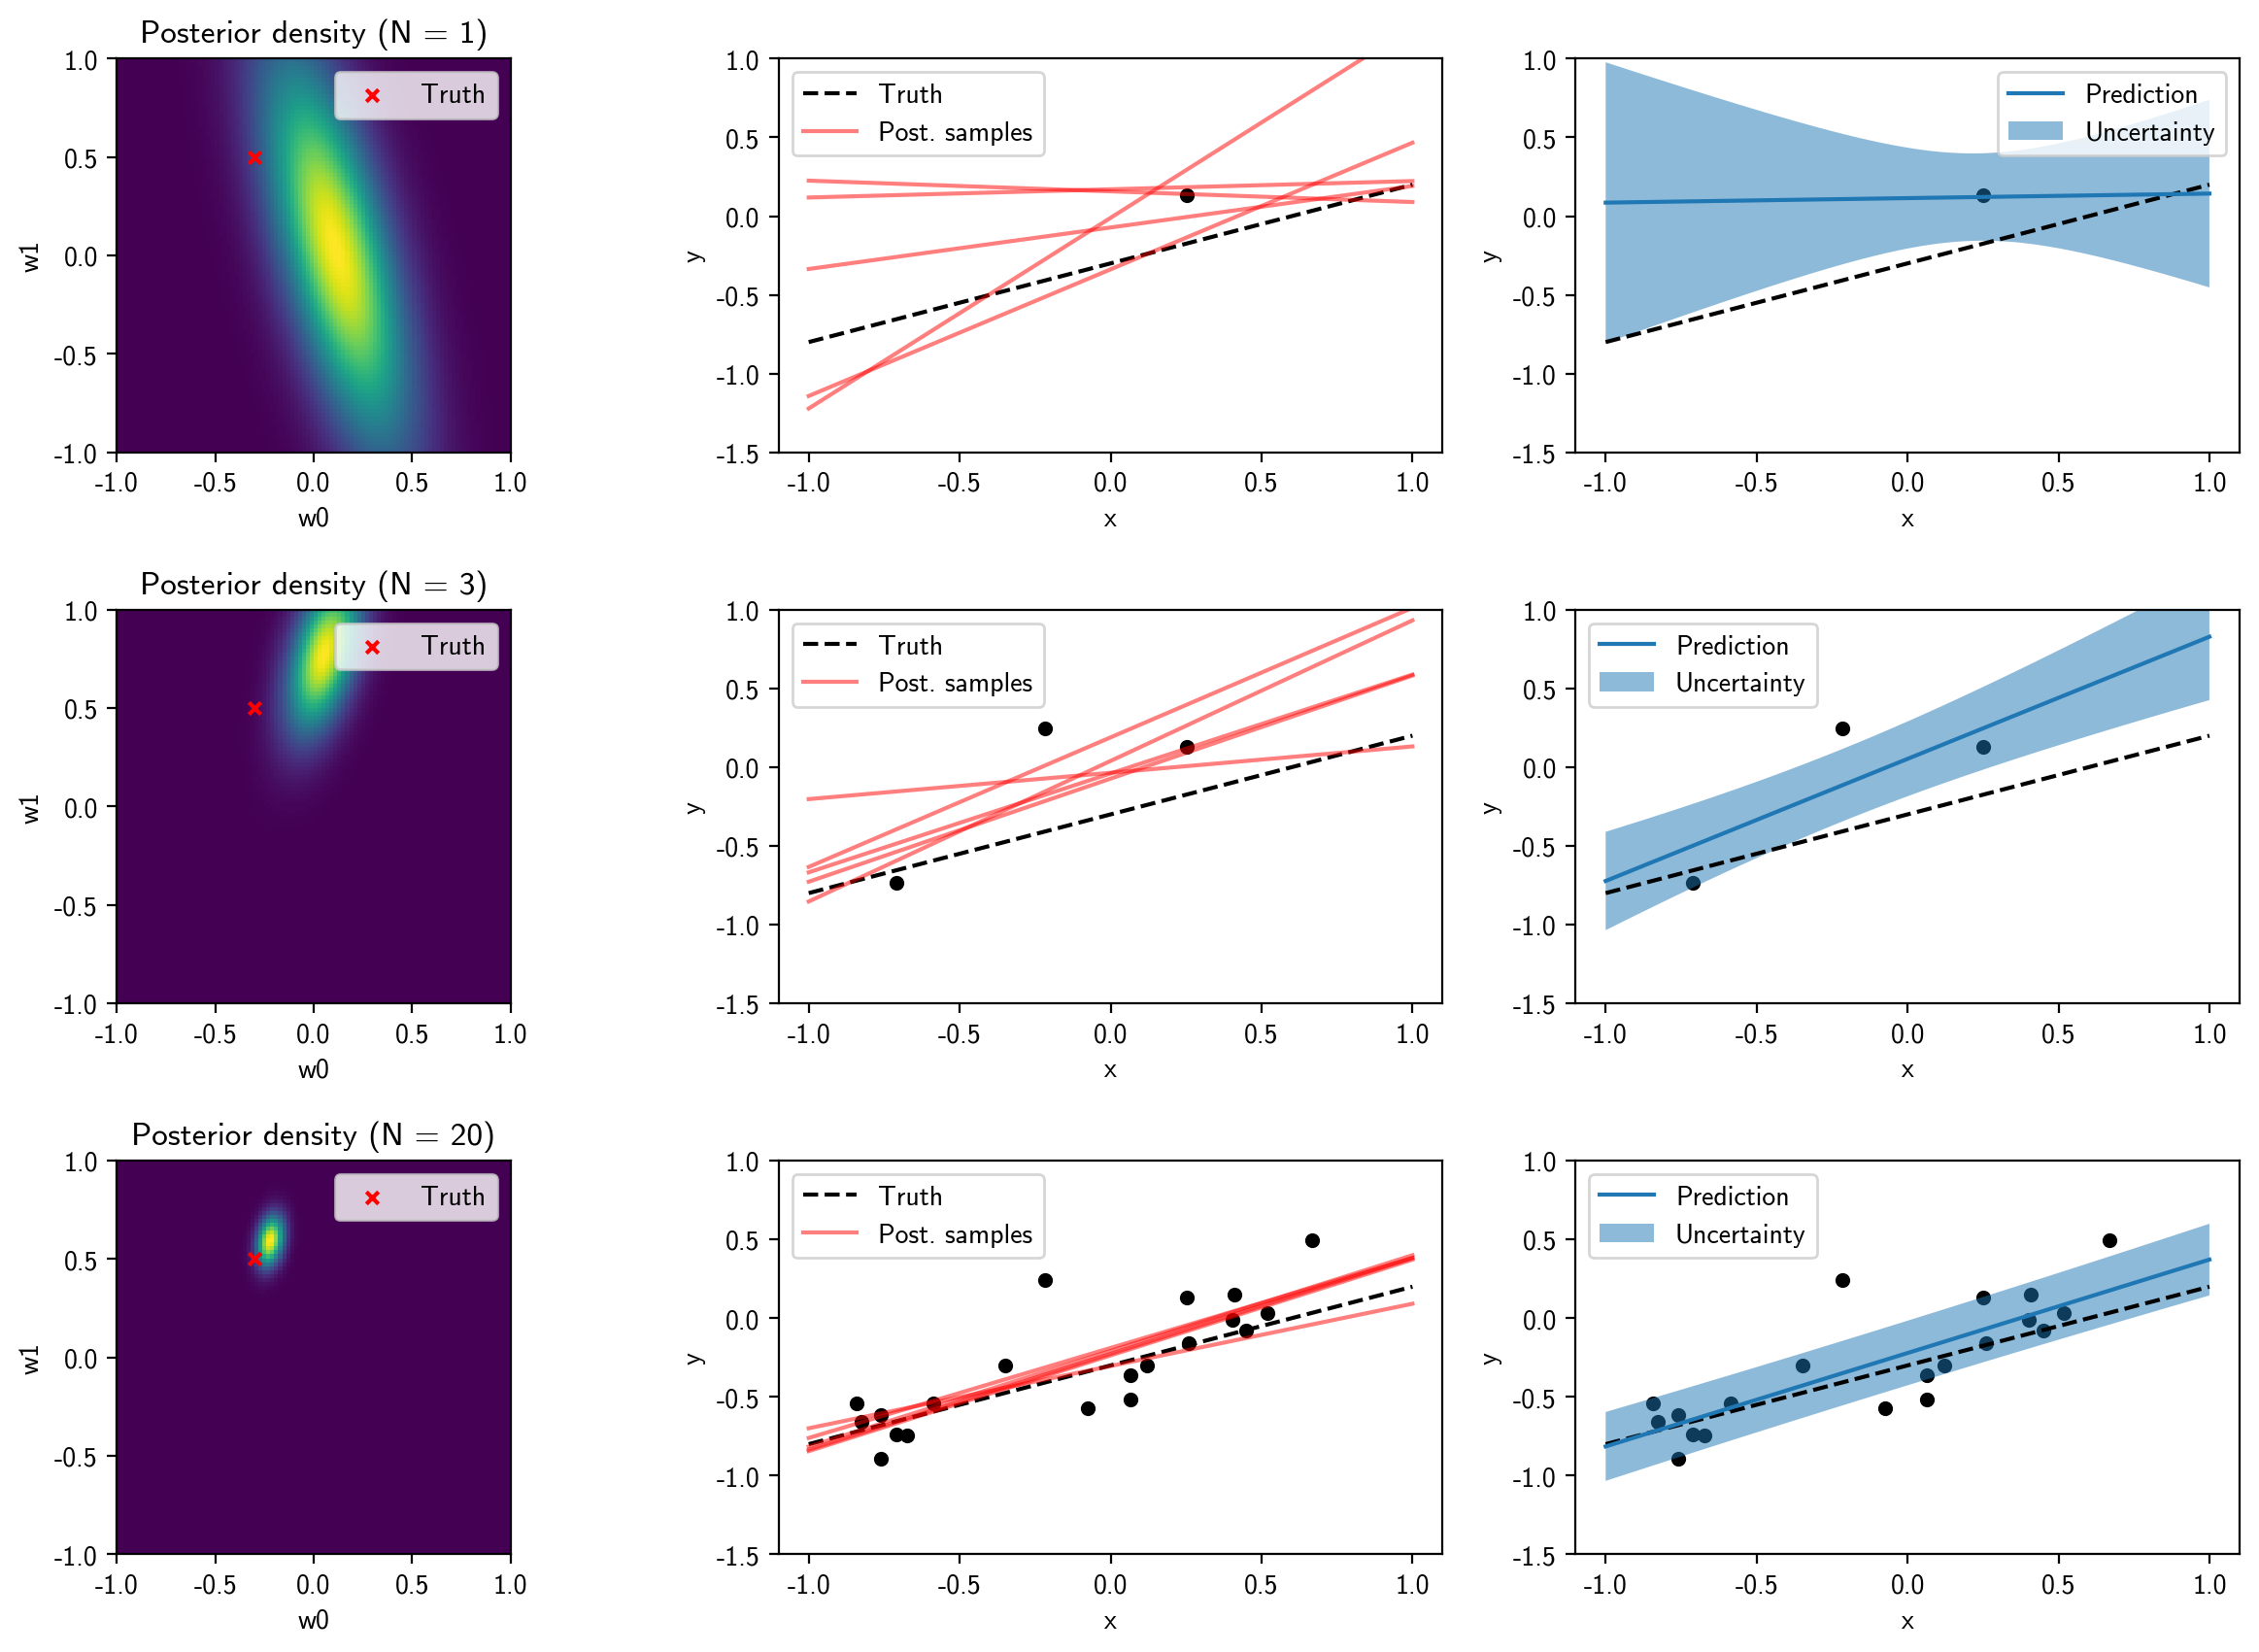

In [37]:
# Training dataset sizes
N_list = [1, 3, 20]

beta = 25.0
alpha = 2.0

# Training observations in [-1, 1)
X = np.random.rand(N_list[-1], 1) * 2 - 1

# Training target values
t = f(X, noise_variance=1 / beta)

# Test observations
X_test = np.linspace(-1, 1, 100).reshape(-1, 1)

# Function values without noise
y_true = f(X_test, noise_variance=0)

# Design matrix of test observations
Phi_test = expand(X_test, identity_basis_function)

plt.figure(figsize=(15, 10))
plt.subplots_adjust(hspace=0.4)

for i, N in enumerate(N_list):
    X_N = X[:N]
    t_N = t[:N]

    # Design matrix of training observations
    Phi_N = expand(X_N, identity_basis_function)

    # Mean and covariance matrix of posterior
    m_N, S_N = posterior(Phi_N, t_N, alpha, beta)

    # Mean and variances of posterior predictive
    y, y_var = posterior_predictive(Phi_test, m_N, S_N, beta)

    # Draw 5 random weight samples from posterior and compute y values
    w_samples = np.random.multivariate_normal(m_N.ravel(), S_N, 5).T
    y_samples = Phi_test.dot(w_samples)

    plt.subplot(len(N_list), 3, i * 3 + 1)
    plot_posterior(m_N, S_N, f_w0, f_w1)
    plt.title(f"Posterior density (N = {N})")
    plt.legend()

    plt.subplot(len(N_list), 3, i * 3 + 2)
    plot_data(X_N, t_N)
    plot_truth(X_test, y_true)
    plot_posterior_samples(X_test, y_samples)
    plt.ylim(-1.5, 1.0)
    plt.legend()

    plt.subplot(len(N_list), 3, i * 3 + 3)
    plot_data(X_N, t_N)
    plot_truth(X_test, y_true, label=None)
    plot_predictive(X_test, y, np.sqrt(y_var))
    plt.ylim(-1.5, 1.0)
    plt.legend()

The following example demonstrates how to fit a Gaussian basis function model to a noisy sinusoidal dataset. It uses 9 Gaussian basis functions with mean values equally distributed over $[0, 1]$ each having a standard deviation of $0.1$. Inference for parameters $\mathbf{w}$ is done in the same way as in the previous example except that we now infer values for 10 parameters (bias term $w_0$ and $w_1,\ldots,w_9$ for the 9 basis functions) instead of 2. We therefore cannot display the posterior density unless we selected 2 parameters at random.

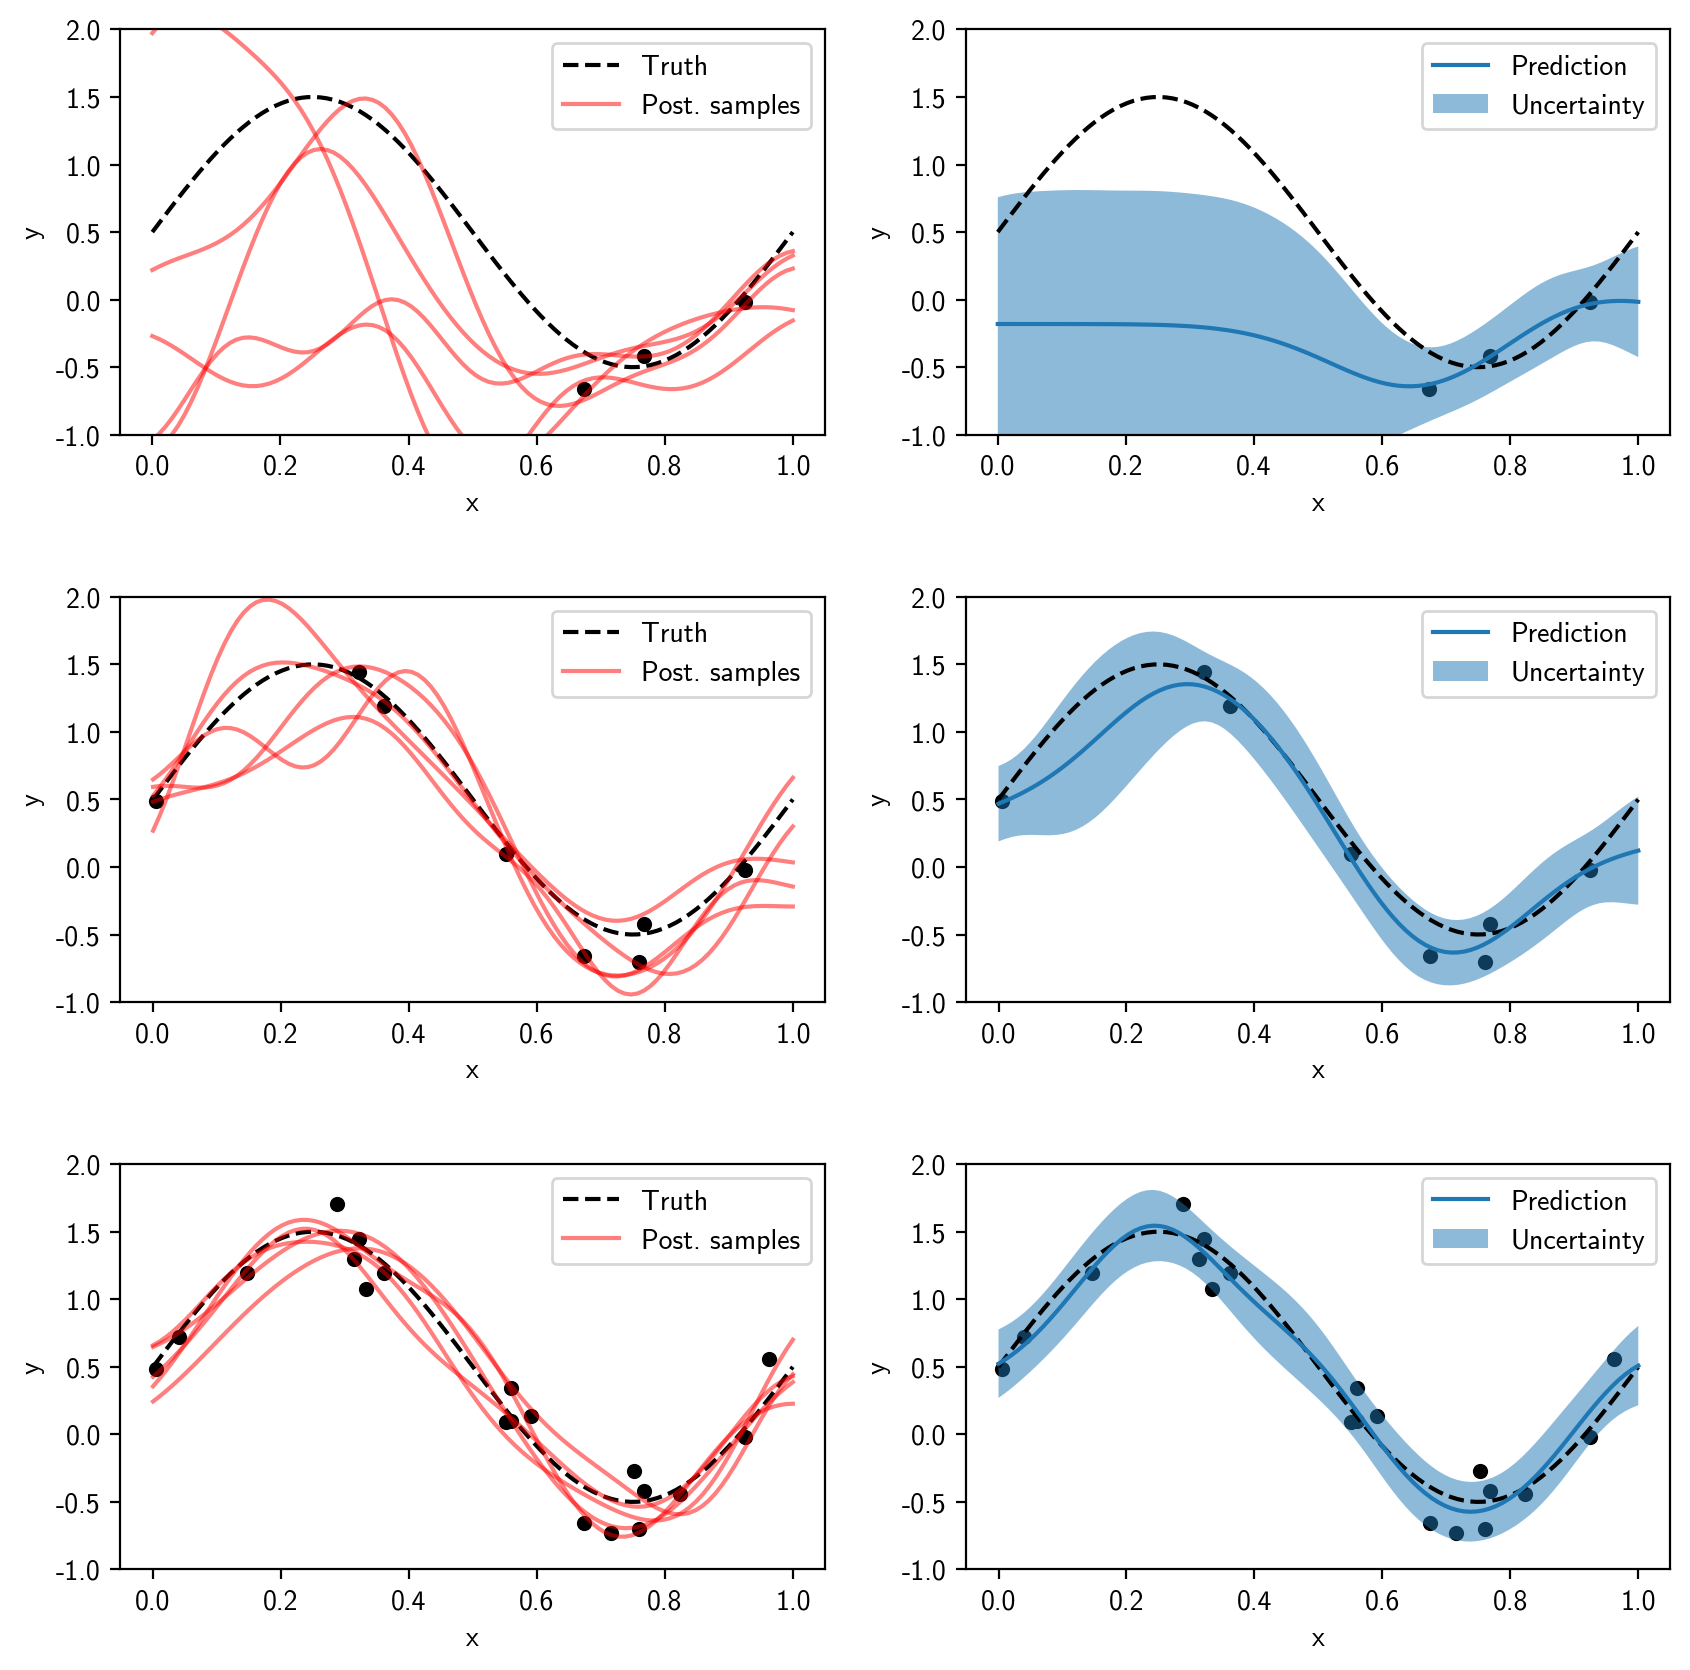

In [38]:
N_list = [3, 8, 20]

beta = 25.0
alpha = 2.0

# Training observations in [-1, 1)
X = np.random.rand(N_list[-1], 1)

# Training target values
t = g(X, noise_variance=1 / beta)

# Test observations
X_test = np.linspace(0, 1, 100).reshape(-1, 1)

# Function values without noise
y_true = g(X_test, noise_variance=0)

# Design matrix of test observations
Phi_test = expand(X_test, bf=gaussian_basis_function, bf_args=np.linspace(0, 1, 9))

plt.figure(figsize=(10, 10))
plt.subplots_adjust(hspace=0.4)

for i, N in enumerate(N_list):
    X_N = X[:N]
    t_N = t[:N]

    # Design matrix of training observations
    Phi_N = expand(X_N, bf=gaussian_basis_function, bf_args=np.linspace(0, 1, 9))

    # Mean and covariance matrix of posterior
    m_N, S_N = posterior(Phi_N, t_N, alpha, beta)

    # Mean and variances of posterior predictive
    y, y_var = posterior_predictive(Phi_test, m_N, S_N, beta)

    # Draw 5 random weight samples from posterior and compute y values
    w_samples = np.random.multivariate_normal(m_N.ravel(), S_N, 5).T
    y_samples = Phi_test.dot(w_samples)

    plt.subplot(len(N_list), 2, i * 2 + 1)
    plot_data(X_N, t_N)
    plot_truth(X_test, y_true)
    plot_posterior_samples(X_test, y_samples)
    plt.ylim(-1.0, 2.0)
    plt.legend()

    plt.subplot(len(N_list), 2, i * 2 + 2)
    plot_data(X_N, t_N)
    plot_truth(X_test, y_true, label=None)
    plot_predictive(X_test, y, np.sqrt(y_var))
    plt.ylim(-1.0, 2.0)
    plt.legend()

As the size of the dataset increases the posterior sample variance and the prediction uncertainty decreases. Also, regions with less observations have higher prediction uncertainty.

### Model Selection

The evidence function or marginal likelihood can be used to compare models of different complexity using training data alone. This is shown here for 10 polynomial basis function models of different degree using a sinusoidal dataset generated with `g`.

In [39]:
def log_marginal_likelihood(Phi, t, alpha, beta):
    """Computes the log of the marginal likelihood."""
    N, M = Phi.shape
    m_N, _, S_N_inv = posterior(Phi, t, alpha, beta, return_inverse=True)
    E_D = beta * np.sum((t - Phi.dot(m_N)) ** 2)
    E_W = alpha * np.sum(m_N ** 2)
    score = M * np.log(alpha) + N * np.log(beta) - E_D - E_W - np.log(np.linalg.det(S_N_inv)) - N * np.log(2 * np.pi)
    return 0.5 * score

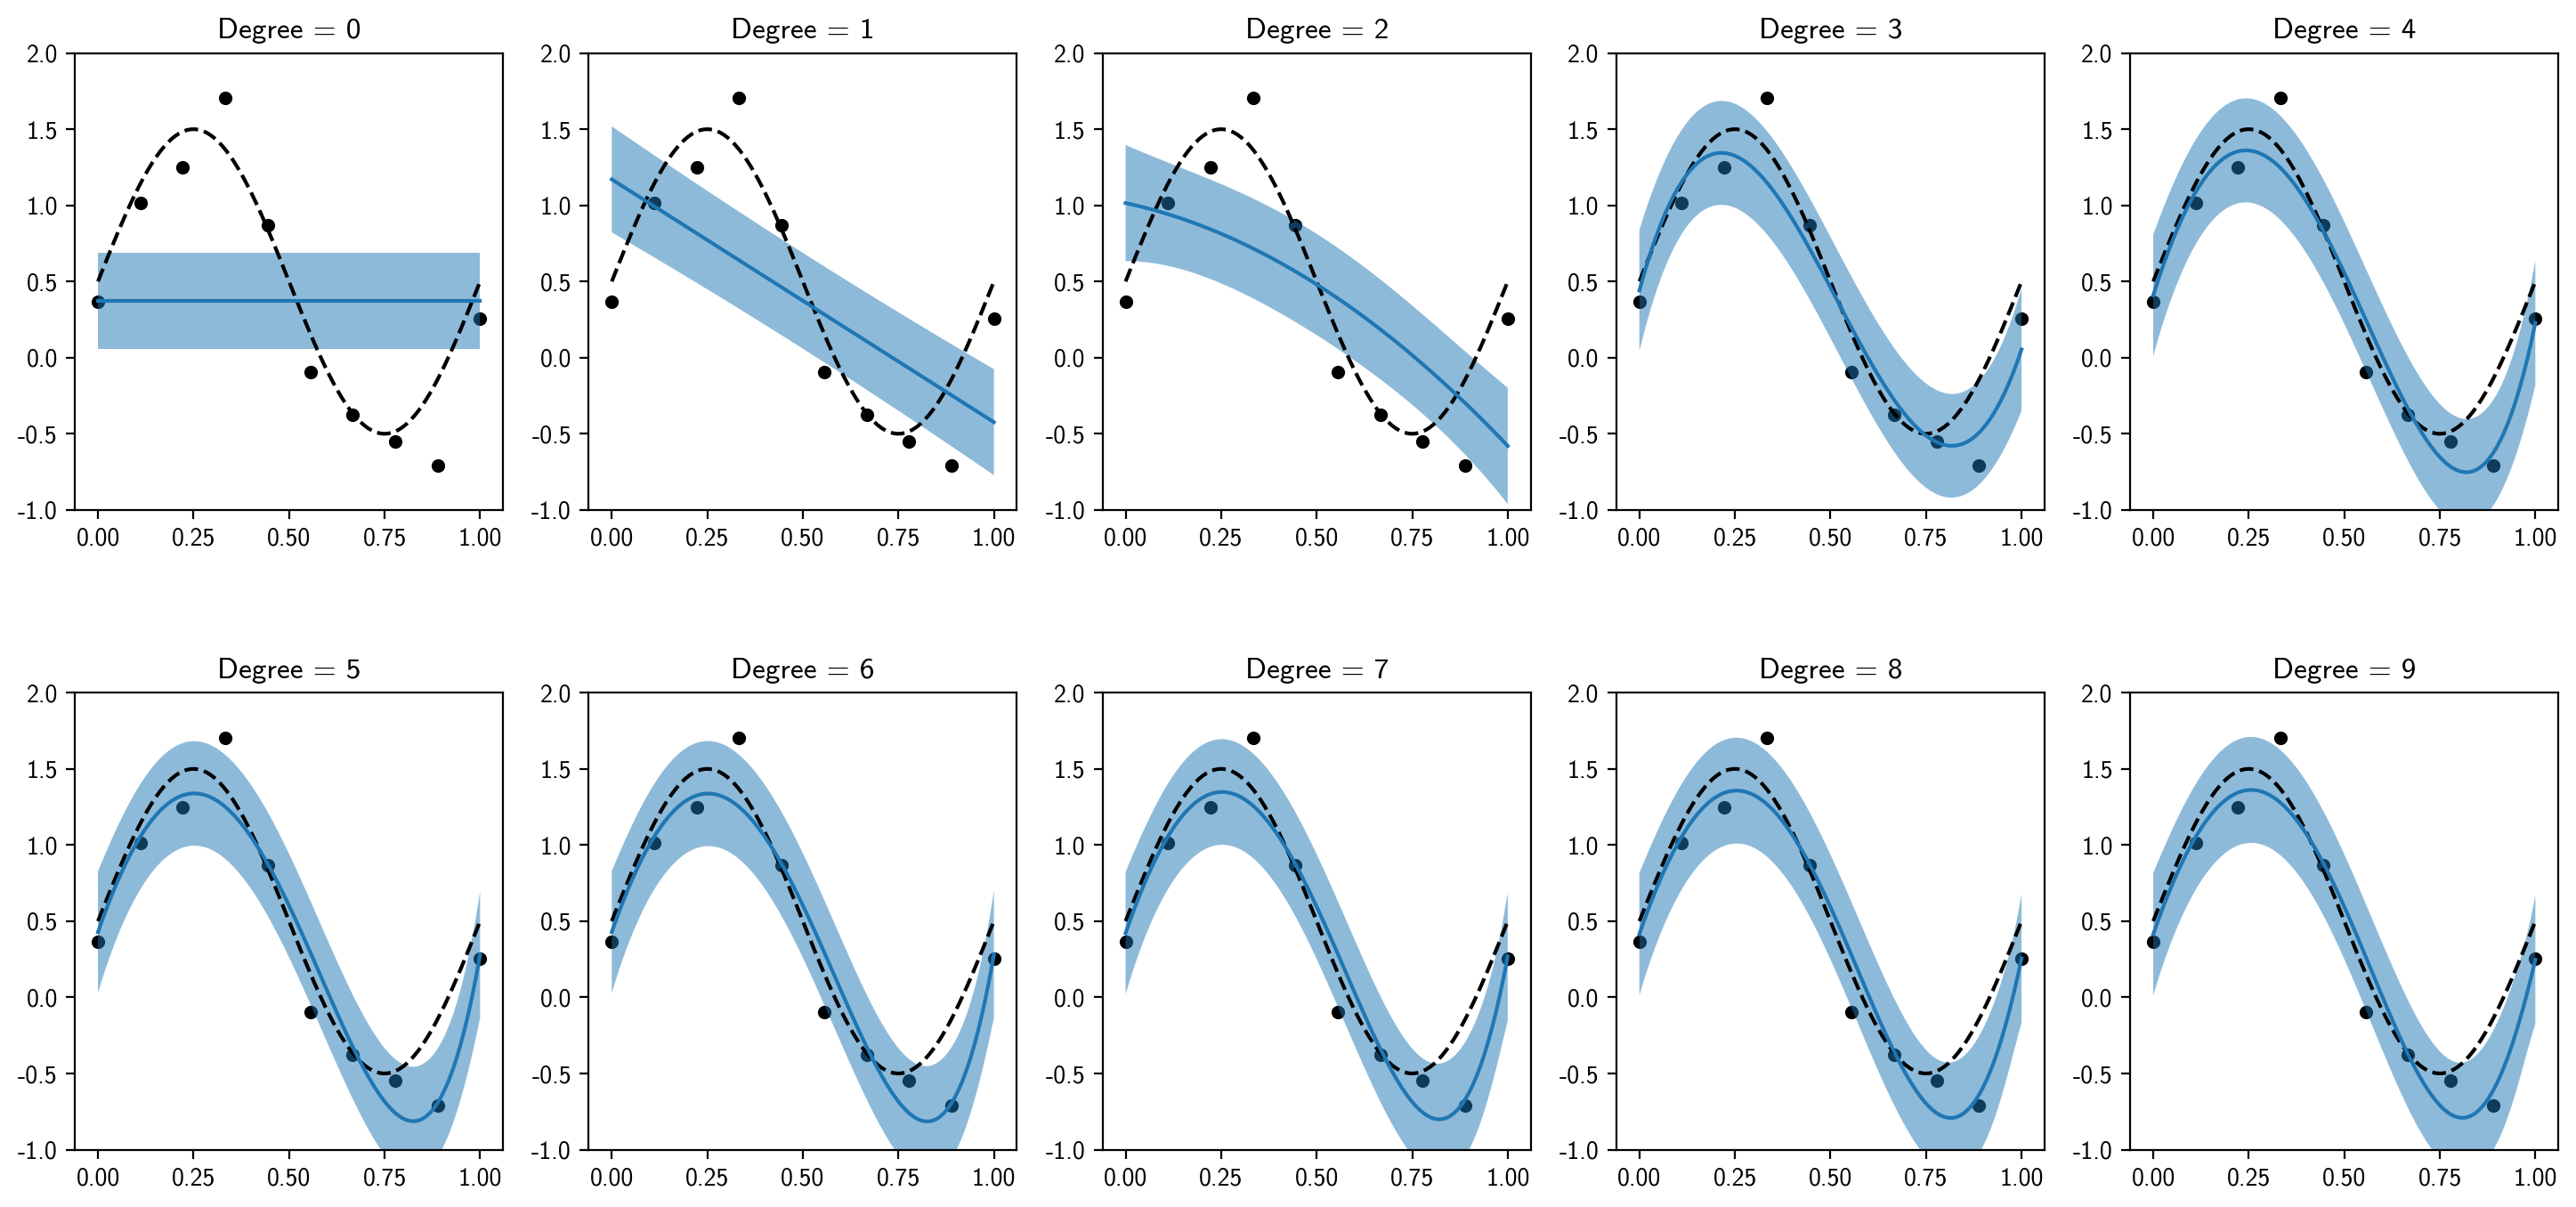

In [40]:
N = 10

beta = 1 / (0.3 ** 2)
alpha = 0.005

degree = 9
degrees = range(degree + 1)

X = np.linspace(0, 1, N).reshape(-1, 1)
t = g(X, noise_variance=1 / beta)

Phi = expand(X, bf=polynomial_basis_function, bf_args=degrees[1:])
Phi_test = expand(X_test, bf=polynomial_basis_function, bf_args=degrees[1:])

plt.figure(figsize=(18, 8))
plt.subplots_adjust(hspace=0.4)

for d in degrees:
    up = d + 1
    m_N, S_N = posterior(Phi[:, :up], t, alpha, beta)
    y, y_var = posterior_predictive(Phi_test[:, :up], m_N, S_N, beta)

    plt.subplot(2, 5, up)
    plot_data(X, t)
    plot_truth(X_test, y_true, label=None)
    plot_predictive(X_test, y, np.sqrt(y_var), y_label=None, std_label=None, plot_xy_labels=False)
    plt.title(f"Degree = {d}")
    plt.ylim(-1.0, 2.0)

We also see how polynomial models of higher degree do not overfit to the dataset which is a consequence of using a prior over model parameters that favors small(er) parameter values. This is equivalent to minimizing a sum-of-squares error function plus a quadratic regularization term whose strength is given by ratio $\alpha / \beta$ as can be seen from equation $(12)$. 

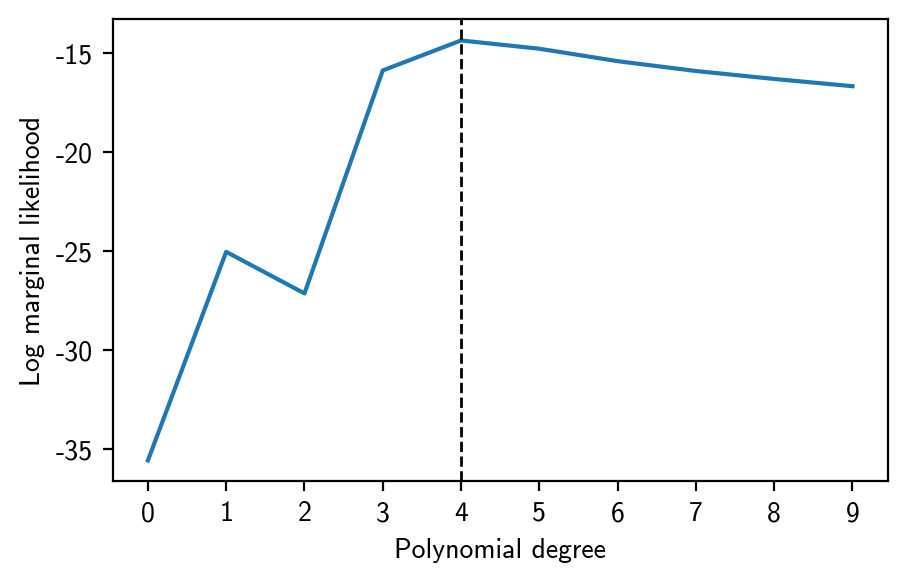

In [43]:
mlls = []
for d in degrees:
    mll = log_marginal_likelihood(Phi[:, : d + 1], t, alpha=alpha, beta=beta)
    mlls.append(mll)

degree_max = np.argmax(mlls)
plt.figure(figsize=(5, 3))
plt.plot(degrees, mlls)
plt.axvline(x=degree_max, ls="--", c="k", lw=1)
plt.xticks(range(0, 10))
plt.xlabel("Polynomial degree")
plt.ylabel("Log marginal likelihood");

This is consistent with the observation that a polynomial model of degree 3 already explains the data sufficiently well and confirms that marginal likelihood evaluation favors models of intermediate complexity. It is also interesting to see that a polynomial model of degree 1 (straight line) seems to explain the data better than a model of degree 2. This is because the data-generating sinusoidal function has no even terms in a polynomial expansion. A model of degree 2 therefore only adds complexity without being able to explain the data better. 

### Evidence Maximization

So far we have assumed that values of $\alpha$ and $\beta$ are known. In most situations however, they are unknown and must be inferred. Iteratively optimizing for $\alpha$ and $\beta$ until convergence jointly infers the posterior distribution over parameters $\mathbf{w}$ and optimal values for parameters $\alpha$ and $\beta$. This is implemented in the following `fit` function. We start with small values for $\alpha$ and $\beta$ corresponding to a low precision (= high variance) of prior and conditional density.

In [47]:
def fit(Phi, t, alpha_0=1e-5, beta_0=1e-5, max_iter=200, rtol=1e-5, verbose=False):
    """
    Jointly infers the posterior sufficient statistics and optimal values 
    for alpha and beta by maximizing the log marginal likelihood.
    
    Args:
        Phi: Design matrix (N x M).
        t: Target value array (N x 1).
        alpha_0: Initial value for alpha.
        beta_0: Initial value for beta.
        max_iter: Maximum number of iterations.
        rtol: Convergence criterion.
        
    Returns:
        alpha, beta, posterior mean, posterior covariance.
    """

    N, M = Phi.shape
    eigenvalues_0 = np.linalg.eigvalsh(Phi.T.dot(Phi))
    beta = beta_0
    alpha = alpha_0

    for i in range(max_iter):
        beta_prev = beta
        alpha_prev = alpha
        eigenvalues = eigenvalues_0 * beta
        m_N, S_N, S_N_inv = posterior(Phi, t, alpha, beta, return_inverse=True)
        gamma = np.sum(eigenvalues / (eigenvalues + alpha))
        alpha = gamma / np.sum(m_N ** 2)
        beta_inv = 1 / (N - gamma) * np.sum((t - Phi.dot(m_N)) ** 2)
        beta = 1 / beta_inv

        if np.isclose(alpha_prev, alpha, rtol=rtol) and np.isclose(beta_prev, beta, rtol=rtol):
            if verbose:
                print(f"Convergence after {i + 1} iterations.")
            return alpha, beta, m_N, S_N

    if verbose:
        print(f"Stopped after {max_iter} iterations.")
    return alpha, beta, m_N, S_N

We now generate a sinusoidal training dataset of size 30 with variance $\beta^{-1} = 0.3^2$ and then use `fit` to obtain the posterior over parameters $\mathbf{w}$ and optimal values for $\alpha$ and $\beta$. The used regression model is a polynomial model of degree 4.

In [48]:
N = 30
degree = 4
X = np.linspace(0, 1, N).reshape(-1, 1)
t = g(X, noise_variance=0.3 ** 2)
Phi = expand(X, bf=polynomial_basis_function, bf_args=range(1, degree + 1))
alpha, beta, m_N, S_N = fit(Phi, t, rtol=1e-5, verbose=True)

Convergence after 21 iterations.


### Scikit-learn Implementation

The implementation of `BayesianRidge` is very similar to our implementation except that it uses [Gamma](https://en.wikipedia.org/wiki/Gamma_distribution) priors over parameters $\alpha$ and $\beta$. The default hyper-parameter values of the Gamma priors assign high probability density to low values for $\alpha$ and $\beta$. In our implementation, we simply start optimization from low $\alpha$ and $\beta$ values. Another difference is that `BayesianRidge` uses different parameter names (`lambda` instead of `alpha` and `alpha` instead of `beta`, see also section [Bayesian Regression](https://scikit-learn.org/stable/modules/linear_model.html#bayesian-regression) in the scikit-learn user guide).

In [51]:
from sklearn.linear_model import BayesianRidge

br = BayesianRidge(fit_intercept=False, tol=1e-5, verbose=True)
br.fit(Phi, t.ravel())
print_comparison("Alpha", alpha, br.lambda_)
print_comparison("Beta", beta, br.alpha_)
print_comparison("Weights", m_N.ravel(), br.coef_)

Convergence after  24  iterations
Alpha
-----
np: 0.006132955204810482
br: 0.006132936509312542

Beta
----
np: 17.293678254007148
br: 17.29366637170199

Weights
-------
np: [  0.50795919   9.22662707 -22.56819581   4.66726058   8.55134942]
br: [  0.50795836   9.22664128 -22.56825026   4.66733445   8.55131652]



In [52]:
# Test values at x = 0.3 and x = 0.7
X_test = np.array([[0.3], [0.7]])

# Design matrix of test values
Phi_test = expand(X_test, bf=polynomial_basis_function, bf_args=range(1, degree + 1))
y_np_mean, y_np_var = posterior_predictive(Phi_test, m_N, S_N, beta)
y_br_mean, y_br_std = br.predict(Phi_test, return_std=True)

print_comparison("Prediction mean", y_np_mean.ravel(), y_br_mean)
print_comparison("Prediction std", np.sqrt(y_np_var), y_br_std)

Prediction mean
---------------
np: [ 1.44009165 -0.43776844]
br: [ 1.44009192 -0.43776856]

Prediction std
--------------
np: [0.25236301 0.25299065]
br: [0.25236309 0.25299073]



In [1]:
from IPython.core.display import HTML
HTML(open('../css/custom.css', 'r').read())